# Collect the data

## Raw data

In [1]:
import os
import pandas as pd
import razdel
import re
import random
import json
from tqdm.auto import tqdm, trange

In [2]:
bp = 'books_mono/'
books_sents = []
for fn in os.listdir(bp):
    if fn.endswith('.txt'):
        print(fn)
        with open(bp + fn, 'r') as f:
            raw_lines = f.readlines()
        sents = []
        raw_text = ''.join(raw_lines).replace('\xa0', ' ')
        raw_text = re.sub('\s+', ' ', raw_text).strip().replace('* ', '')
        
        for sent in list(razdel.sentenize(raw_text)):
            text = sent.text.replace('-\n', '').replace('\n', ' ').strip()
            if len(text) >= 3 and len(text) <= 500:
                sents.append(text)
        print(len(sents))
        books_sents.extend(sents)
        
print(len(books_sents))

Balankin_001.txt
917
BeBANMaksimAfanas'evich_002.txt
6485
BeZBoRoDoVMihailIl'ich_002.txt
4734
EjovAnatoliiiFedorovich_002.txt
1075
GolenkovNikolaiiBorisovich_002.txt
3192
Kemaiikina_001.txt
2195
kosheleva_001.txt
382
KyldyrkaevEAkovEAkovlevich_001.txt
3214
KyldyrkaevEAkovEAkovlevich_002.txt
7795
LiyleakinaSerafimaMarkovna_001.txt
2171
RadaevVasiliiiKyz'mich_002.txt
8201
Александр Арапов.txt
2816
Лобанов.txt
336
радаев.txt
8201
Яков Кулдуркаев - ЭРЬМЕЗЬ.txt
1156
52870


In [3]:
random.choice(books_sents)

'Явсть минь киньке, кода лофне Тунда явихть модать эзда.'

In [4]:
bp = 'fennougrica_text/'
fennougrica_sents = []

for fn in os.listdir(bp):
    if fn.endswith('.txt'):
        with open(bp + fn, 'r') as f:
            raw_lines = f.readlines()
        sents = []
        raw_text = ''.join(raw_lines).replace('\xa0', ' ')
        raw_text = re.sub('\s+', ' ', raw_text).strip().replace('* ', '')
        
        for sent in list(razdel.sentenize(raw_text)):
            text = sent.text.replace('-\n', '').replace('\n', ' ').strip()
            if len(text) >= 3 and len(text) <= 500:
                sents.append(text)
        fennougrica_sents.extend(sents)
        
print(len(fennougrica_sents))

54798


In [5]:
random.choice(fennougrica_sents)

'Сталинской Колмоце Пятилеткастонть макстано масторонтень пландо велькска сядот тоннат продукция.'

In [6]:
with open('other_sources/wikisource_myv_clean.json', 'r') as f:
    ws = json.load(f)

In [7]:
wikisource_sentences = []

for text in ws.values():
    sents = []
    raw_text = ''.join(text).replace('\xa0', ' ')
    raw_text = re.sub('\s+', ' ', raw_text).strip().replace('* ', '')

    for sent in list(razdel.sentenize(raw_text)):
        text = sent.text.replace('-\n', '').replace('\n', ' ').strip()
        if len(text) >= 3 and len(text) <= 500:
            sents.append(text)
    wikisource_sentences.extend(sents)

print(len(wikisource_sentences))

120470


In [8]:
random.choice(wikisource_sentences)

'Эйкакштнэнь седе курок саить, эйкакштнэнь...'

In [9]:
pravda = pd.read_csv('other_sources/erzya_pravda.tsv', sep='\t')

In [10]:
pravda_sents = []

for text in pravda.body:
    sents = []
    raw_text = ''.join(text).replace('\xa0', ' ')
    raw_text = re.sub('\s+', ' ', raw_text).strip().replace('* ', '')

    for sent in list(razdel.sentenize(raw_text)):
        text = sent.text.replace('-\n', '').replace('\n', ' ').strip()
        if len(text) >= 3 and len(text) <= 500:
            sents.append(text)
    pravda_sents.extend(sents)
    
len(pravda_sents)

43772

In [11]:
random.choice(pravda_sents)

'Берянь ёнов полавтовсь Культурань кудоськак.'

In [12]:
with open('other_sources/livejournal_clean_myv.json', 'r') as f:
    lj = json.load(f)

In [13]:
lj_sentences = []

for text in tqdm(lj.values()):
    sents = []
    raw_text = ''.join(text).replace('\xa0', ' ')
    raw_text = re.sub('\s+', ' ', raw_text).strip().replace('* ', '')

    for sent in list(razdel.sentenize(raw_text)):
        text = sent.text.replace('-\n', '').replace('\n', ' ').strip()
        if len(text) >= 3 and len(text) <= 500:
            sents.append(text)
    lj_sentences.extend(sents)

print(len(lj_sentences))

  0%|          | 0/1132 [00:00<?, ?it/s]

36584


In [14]:
with open('wiki/clean_myv.json', 'r') as f:
    wiki = json.load(f)

In [15]:
wiki_sentences = []

for text in wiki.values():
    sents = []
    raw_text = ''.join(text).replace('\xa0', ' ')
    raw_text = re.sub('\s+', ' ', raw_text).strip().replace('* ', '')

    for sent in list(razdel.sentenize(raw_text)):
        text = sent.text.replace('-\n', '').replace('\n', ' ').strip()
        if len(text) >= 3 and len(text) <= 500:
            sents.append(text)
    wiki_sentences.extend(sents)

print(len(wiki_sentences))

59569


In [16]:
random.choice(wiki_sentences)

'Те - кудо.'

In [17]:
erzya_bible = pd.read_csv('erzya_bible.tsv', sep='\t')
bible_sentences = erzya_bible.myv.dropna().tolist()
len(bible_sentences)

12912

In [18]:
random.choice(bible_sentences)

'Кие корты асодавикс кельсэ, се корты Пазонтень, аволь ломантненень, секс мекс сонзэ кияк а чарькодьсы. Сон корты салавачить Пазонь Оймеялтонть ветямонзо коряс.'

In [19]:
with open('other_sources/BrizhinskiyVasiliySergeevich_001___sentences_unaligned.json', 'r') as f:
    games = json.load(f)

In [20]:
games_sents = [p[0] for p in games['myv']]
print(len(games_sents))

5194


In [21]:
random.choice(games_sents)

'Тень кисэ ули мелезэ саемс эстензэ тарка микшницянь куросо ды седе питнейстэ миемс ансяконь рамавт товаронзо, чакшкензэ.'

В итоге у меня набралось 300К уникальных предложений, что в общем-то весьма круто!

In [22]:
all_sentences = sorted(set(
    books_sents + fennougrica_sents + wikisource_sentences + pravda_sents + lj_sentences + wiki_sentences + bible_sentences  +games_sents
))
print(len(all_sentences))

306557


## Sentence-parallel data

In [23]:
bible = pd.read_csv('erzya_bible.tsv', sep='\t')
print(bible.shape)
bible = bible.dropna()
print(bible.shape)
bible = bible[~bible.myv.str.startswith('Глава ')]
print(bible.shape)
print(bible.columns)

(12926, 4)
(12899, 4)
(12483, 4)
Index(['Unnamed: 0', 'myv', 'ru', 'source'], dtype='object')


In [24]:
bible_pairs = list(zip(bible.myv, bible.ru))
print(len(bible_pairs))
random.choice(bible_pairs)

12483


('Пежетькстан-божан Пазонть икеле: мезде тыненк сёрмадан, те виде, аволь кенгелямо.',
 'А в том, что пишу вам, пред Богом, не лгу.')

In [25]:
with open('opus_aligned/wikimedia.myv-ru.myv', 'r') as f:
    opus_m = [line.strip() for line in f.readlines()]
with open('opus_aligned/wikimedia.myv-ru.ru', 'r') as f:
    opus_r = [line.strip() for line in f.readlines()]
assert len(opus_r) == len(opus_m)

In [26]:
opus_pairs = list(zip(opus_m, opus_r))
print(len(opus_pairs))

3202


In [27]:
random.choice(opus_pairs)

('Ташто найманось ашти ошонь куншкакуронть вакссо Крана леенть тона чиресэ сэденть трокс 5 минутань ютамо туросо.',
 'Старый базар находится рядом с центром города на другом берегу реки Крана в 5 минутах ходьбы через мост.')

In [28]:
from ast import literal_eval

In [29]:
dict1 = pd.read_csv('russian-moksha-erzya-dictionary_fixed.tsv', sep='\t')
dict1['mo'] = dict1['mo'].apply(literal_eval)
dict1['er'] = dict1['er'].apply(literal_eval)

In [30]:
dict1.sample(5)

,Unnamed: 0,ru,mo,er,ru_fix
3722,3722,качать,"[люкафтомс, нюряфтомс, яфиемс/ шерьфтемс/ люка...","[нурсемс, юхаемс, чаравтомс, пештемс]",качать
5120,5120,нагретый,[эждьф],[эждезь],нагретый
5303,5303,намешать,"[каямс, шовордамс]","[каямс, човордамс]",намешать
6010,6010,обезобразить,"[гастямс, кальдявгофтомс]",[теемс а мазыйкс],обезобразить
7301,7301,покос,"[лядема ланга, лядема васта]","[ледема ланго, ледема тарка]",покос


In [31]:
dict1_pairs = []
for row in dict1.itertuples():
    for er in row.er:
        dict1_pairs.append((er, row.ru_fix))

In [32]:
print(len(dict1_pairs))
random.choice(dict1_pairs)

22499


('моргов чувто', 'коряга')

In [33]:
joint_phrasebook = pd.read_csv('other_sources/joint_phrasebook.tsv', sep='\t')

In [34]:
joint_phrasebook.sample(5)

,myv,ru,source
33356,пачтямс куля,доложить,schankina
17988,парнэ,жеребёнок,marlamuter
37141,понгомс ульмас,клюнуть,schankina
27147,экспериментальной,экспериментальный,marlamuter
40219,пештемс качамодо панемс пичеой,накурить,schankina


In [35]:
joint_phrasebook.isnull().sum()

myv        2
ru        35
source     0
dtype: int64

In [36]:
joint_phrasebook_pairs = [(row.myv, row.ru) for row in joint_phrasebook.dropna().itertuples() if row.myv != row.ru]
print(len(joint_phrasebook_pairs))

47860


In [37]:
with open('other_sources/sheyanova_sentence_aligned.json', 'r') as f:
    sheyanova_aligned = json.load(f)
    
sheyanova_pairs = [(p['myv'], p['ru']) for p in sheyanova_aligned]
print(len(sheyanova_pairs))

1023


In [38]:
random.choice(sheyanova_pairs)

('Кода весе се таркатне ютавсть, чуважонь инязорось виензэ марто яла пани мельгаст, арсесь, што сонзэ тевезэ моли икелев ды курок пачкоди Веталанонь ошс.',
 'Веталан получил от своей тещи, Паштени, подмогу, завлек чувашей в глубь страны, а потом, воспользовавшись темной ночью, напал на них и загнал в глубокий и страшный овраг, попав в который, чувашский царь и все его войско убились досмерти.')

In [39]:
with open('other_sources/brizhinskiy_sentence_aligned.json', 'r') as f:
    brizhinskiy_aligned = json.load(f)
    
brizhinskiy_pairs = [(p['myv'], p['ru']) for p in brizhinskiy_aligned]
print(len(brizhinskiy_pairs))

4203


In [40]:
random.choice(brizhinskiy_pairs)

('Н е ш к е п и р е н ь а з о р о с ь (амельсэ).',
 'П а с е ч н и к (недовольно).')

In [41]:
with open('other_sources/evsenyev_stories_aligned.json', 'r') as f:
    evs_pairs = json.load(f)
evs_pairs = [tuple(p) for p in evs_pairs]
print(len(evs_pairs))

3776


In [42]:
random.choice(evs_pairs)

('Ансяк улезэ Канёва сазоронок жив.',
 'Только была бы жива наша сестренка Канева.')

In [43]:
with open('wiki/myv_ru_aligned.json', 'r') as f:
    wiki_pairs = json.load(f)
wiki_pairs = [tuple(p) for p in wiki_pairs]
print(len(wiki_pairs))

11479


In [44]:
random.choice(wiki_pairs)

('Верещагинский райо́н) — административной таркань буе Пермень крайесэ, Россиясо.',
 'Вереща́гинский райо́н — административный район Пермского края.')

In [45]:
with open('other_sources/livejournal_myv_ru_aligned.json', 'r') as f:
    lj_pairs = json.load(f)
lj_pairs = [tuple(p) for p in lj_pairs]
print(len(lj_pairs))

1799


In [46]:
random.choice(lj_pairs)

('Мезесь пек кенярдовтымим, \xa0те – «Вконтакте» сайтэнть эрзянь кельсэ важодемазо!',
 'А еще, я очень рад тому, что можно пользоваться сайтом «Вконтакте» на родном эрзянском языке!')

In [47]:
with open('other_sources/rus4all_myv_ru_aligned.json', 'r') as f:
    rus4all_pairs = json.load(f)
rus4all_pairs = [tuple(p) for p in rus4all_pairs]
print(len(rus4all_pairs))

916


In [48]:
random.choice(rus4all_pairs)

('Зярс служась, колхозось кармась каладомо — ды сехте васенцекс мекс-бути лоткасть пандомодо ломантненень.',
 'Пока служил, колхоз задышал на ладан — и в первую очередь почему-то перестали платить людям за работу.')

In [49]:
with open('other_sources/ussr_constitution_aligned.json', 'r') as f:
    const_pairs = json.load(f)
const_pairs = [tuple(p) for p in const_pairs]
print(len(const_pairs))

304


In [50]:
random.choice(const_pairs)

('Оборонань;', 'Обороны;')

In [51]:
all_pairs = sorted({
    c for c in 
    dict1_pairs + joint_phrasebook_pairs 
    + opus_pairs + bible_pairs 
    + sheyanova_pairs + brizhinskiy_pairs
    + wiki_pairs
    + lj_pairs
    + rus4all_pairs
    + const_pairs
    + evs_pairs
    if c[0] and c[1]
})
print(len(all_pairs))

77630


In [52]:
all_sentences = sorted(set(
    all_sentences + [e for e, r in all_pairs if len(e.split()) >= 3]
))
print(len(all_sentences))

317827


# Vocabulary extension

In [454]:
from collections import Counter, defaultdict
import numpy as np

In [439]:
from transformers import AutoModelForPreTraining, AutoTokenizer, BertTokenizer

In [437]:
base_model = 'cointegrated/LaBSE-en-ru'

In [440]:
tokenizer = BertTokenizer.from_pretrained(base_model)
print(tokenizer.vocab_size)

55083


In [471]:
model = AutoModelForPreTraining.from_pretrained(base_model)

In [458]:
tokenizer.tokenize('привет, как делишки?')

['привет', ',', 'как', 'дели', '##шки', '?']

In [443]:
word_count = Counter()
for text in tqdm(all_sentences):
    word_count.update(tokenizer.basic_tokenizer.tokenize(text))

  0%|          | 0/306557 [00:00<?, ?it/s]

In [444]:
print(len(word_count))
word_count.most_common(20)

387893


[('.', 537905),
 (',', 336607),
 ('-', 121259),
 ('—', 64732),
 ('ды', 63745),
 (':', 36523),
 (')', 31829),
 ('а', 31143),
 ('(', 30733),
 ('»', 30631),
 ('«', 30229),
 ('!', 20941),
 ('?', 19168),
 ('и', 17296),
 ('–', 16612),
 ('марто', 14049),
 ('те', 13418),
 ('кода', 10898),
 ('це', 10507),
 ('сон', 10424)]

In [450]:
print(sum(1 for v in word_count.values() if v > 100))
print(sum(1 for v in word_count.values() if v > 30))
print(sum(1 for v in word_count.values() if v > 10))

3946
12183
31319


In [451]:
steps = 100_000
min_count = 30
extra_vocab = []
extra_counts = []

id2ids = [[idx] for tok, idx in tokenizer.vocab.items()]
tok2id = {tok: idx for tok, idx in tokenizer.vocab.items()}

In [452]:
word2toks = {w: tokenizer.wordpiece_tokenizer.tokenize(w) for w in tqdm(word_count)}

  0%|          | 0/387893 [00:00<?, ?it/s]

In [455]:
pairs_count = Counter()
pair2word = defaultdict(set)
for w, c in tqdm(word_count.items(), total=len(word_count)):
    enc = word2toks[w]
    for pair in zip(enc[:-1], enc[1:]):
        pairs_count[pair] += c
        pair2word[pair].add(w)

  0%|          | 0/387893 [00:00<?, ?it/s]

In [456]:
from heapdict import heapdict
hd = heapdict()
for w, c in pairs_count.items():
    hd[w] = -c

In [457]:
def replace_pair(old_tokens, pair, new_token):
    result = []
    prev = old_tokens[0]
    for tok in old_tokens[1:]:
        if (prev, tok) == pair:
            result.append(new_token)
            prev = None
        else:
            if prev is not None:
                result.append(prev)
            prev = tok
    if prev is not None:
        result.append(prev)
    return result

In [459]:
# rewrite with heapdict
for _ in trange(steps):
    pair, c = hd.peekitem()
    c = -c
    
    if c < min_count:
        break
    new_token = pair[0] + pair[1][2:]
    extra_vocab.append(new_token)
    extra_counts.append(c)
    
    # update the vocabulary
    new_id = len(id2ids)
    tok2id[new_token] = new_id
    id2ids.append(id2ids[tok2id[pair[0]]] + id2ids[tok2id[pair[1]]]) 
    
    # calculate the delta for the heap
    delta = Counter()
    for word in list(pair2word[pair]):
        # calculate old and new ways to tokenize the word
        old_toks = word2toks[word]
        new_toks = replace_pair(old_toks, pair, new_token)
        word2toks[word] = new_toks
        wc = word_count[word]
        # update the index concerning the tokens of the word
        for old_pair in zip(old_toks[:-1], old_toks[1:]):
            delta[old_pair] -= wc
            if word in pair2word[old_pair]:
                pair2word[old_pair].remove(word)
        for new_pair in zip(new_toks[:-1], new_toks[1:]):
            delta[new_pair] += wc
            pair2word[new_pair].add(word)
    # update the heap
    for a_pair, a_delta in delta.items():
        if a_delta == 0:
            continue
        if a_pair not in hd:
            hd[a_pair] = 0
        hd[a_pair] -= a_delta

  0%|          | 0/100000 [00:00<?, ?it/s]

In [460]:
print(len(extra_vocab))

19098


In [461]:
old_vocab_size = len(tokenizer.vocab)

In [465]:
random.seed(1)
sample_texts = random.choices(all_sentences, k=1000)
old_len = np.mean([len(tokenizer.tokenize(t)) for t in sample_texts])
print(old_len)

30.855


In [466]:
print(len(tokenizer.vocab) + len(tokenizer.get_added_vocab()))

55083


In [467]:
tmp_tok = 'tmp_tok'
tokenizer.save_pretrained(tmp_tok)

('tmp_tok\\tokenizer_config.json',
 'tmp_tok\\special_tokens_map.json',
 'tmp_tok\\vocab.txt',
 'tmp_tok\\added_tokens.json')

In [468]:
with open(tmp_tok + '/vocab.txt', 'a') as f:
    for token in extra_vocab:
        f.write(token + '\n')

In [469]:
tokenizer = BertTokenizer.from_pretrained(tmp_tok)

In [470]:
new_len = np.mean([len(tokenizer.tokenize(t)) for t in sample_texts])
print(new_len)
print(new_len / old_len)

18.67
0.6050883163182629


In [472]:
print(len(tokenizer.vocab) + len(tokenizer.get_added_vocab()))

74181


In [473]:
model.resize_token_embeddings(tokenizer.vocab_size)

Embedding(74181, 768)

In [474]:
for i, ids_from in enumerate(tqdm(id2ids)):
    if len(ids_from) == 1:
        continue
    model.bert.embeddings.word_embeddings.weight.data[i] = model.bert.embeddings.word_embeddings.weight.data[ids_from].mean(0)

  0%|          | 0/74181 [00:00<?, ?it/s]

In [477]:
del tokenizer.init_kwargs['special_tokens_map_file']  # this is required for correct creation of fast tokenizer from it

In [482]:
NEW_MODEL_NAME = 'labse_erzya_v0'
model.save_pretrained(NEW_MODEL_NAME)
tokenizer.save_pretrained(NEW_MODEL_NAME)

('labse_erzya_v0\\tokenizer_config.json',
 'labse_erzya_v0\\special_tokens_map.json',
 'labse_erzya_v0\\vocab.txt',
 'labse_erzya_v0\\added_tokens.json')

# Training the model

In [571]:
import gc

def cleanup():
    gc.collect()
    torch.cuda.empty_cache()
    
cleanup()

In [507]:
import torch

In [484]:
model.cuda();

Чтобы модель выучила словарь, будем подтягивать эмбеддинги эрзянских предложений к соответствующим эмбеддингам русских. 

In [493]:
for p in model.parameters():
    p.requires_grad = False
for p in model.bert.embeddings.word_embeddings.parameters():
    p.requires_grad = True

In [574]:
batch_size = 4
margin = 0.3

In [553]:
loss_fn = torch.nn.CrossEntropyLoss()

In [530]:
from transformers.optimization import Adafactor
optimizer = Adafactor(
    [p for p in model.parameters() if p.requires_grad], 
    scale_parameter=False, relative_step=False, lr=1e-5, clip_threshold=1.0
)

In [658]:
def get_acc(embeddings):
    batch_size = embeddings.shape[0] // 2
    with torch.no_grad():
        scores = torch.matmul(
            embeddings[:batch_size].detach(),
            embeddings[batch_size:].T
        ).cpu().numpy()
    a1 = (scores.argmax(1) == np.arange(batch_size)).mean()
    a2 = (scores.argmax(0) == np.arange(batch_size)).mean()
    return (a1 + a2) / 2

In [576]:
losses = []

In [652]:
accuracies = []

In [772]:
model.train()
tq = trange(300_000)
for i in tq:
    myv, ru = [list(p) for p in zip(*random.choices(all_pairs, k=batch_size))]
    try:
        batch = tokenizer(ru+myv, return_tensors='pt', padding=True, truncation=True, max_length=128).to(model.device)
        out = model.bert(**batch, output_hidden_states=True)
        embeddings = torch.nn.functional.normalize(out.pooler_output)
        all_scores = torch.matmul(
            embeddings[:batch_size].detach(), # keep Russian embeddings frozen
            embeddings[batch_size:].T  # update Erzya embeddings
        ) - torch.eye(batch_size, device=model.device) * margin
        loss = loss_fn(all_scores, torch.arange(batch_size, device=model.device)) + loss_fn(all_scores.T, torch.arange(batch_size, device=model.device))

        loss.backward()
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)
        losses.append(loss.item())
        accuracies.append(get_acc(embeddings))
    except RuntimeError:
        optimizer.zero_grad(set_to_none=True)
        batch, out, embeddings, all_scores, loss = None, None, None, None, None
        cleanup()
        print('error', max(len(s) for s in myv+ru))
        continue
    if i % 100 == 0:
        print(i, np.mean(losses[-100:]), np.mean(accuracies[-100:]))

  0%|          | 0/300000 [00:00<?, ?it/s]

0 2.2401464593410494 0.95875
100 2.256891255378723 0.94875
200 2.2599706768989565 0.97125
300 2.2349245953559875 0.96375
400 2.2714816999435423 0.96375
500 2.2874680173397066 0.95125
600 2.3030453848838808 0.95375
700 2.253097994327545 0.95875
800 2.241684103012085 0.955
900 2.2901425731182097 0.95625


KeyboardInterrupt: 

In [777]:
optimizer.zero_grad(set_to_none=True)
batch, out, embeddings, all_scores, loss = None, None, None, None, None
cleanup()

In [657]:
print(torch.matmul(
    embeddings[:batch_size].detach(), # keep Russian embeddings frozen
    embeddings[batch_size:].T  # update Erzya embeddings
))

tensor([[0.8775, 0.0285, 0.0679, 0.0913],
        [0.0908, 0.5250, 0.4368, 0.5497],
        [0.0043, 0.4049, 0.7021, 0.3934],
        [0.0662, 0.4138, 0.8327, 0.5108]], device='cuda:0',
       grad_fn=<MmBackward>)


In [649]:
ru

['Надгробие Петр Бериславича в Соборе Святого Михаила в Веспреме',
 'надпись',
 'оклеветать',
 'занумеровать']

In [650]:
myv

['Веспремсэ Святой Михаилэнь соборсо Петар Бериславичень калмонь лангозо',
 'сёрмадовкс',
 'сялдомс',
 'путнемс номерт']

At about 140K steps I have added more phrases to the parallel dictionary, so the loss should probably go up.

At 290K I added Sheyanova and Brizhinsky parallel sentences, and the loss should go up again. The loss suddenly went down, probably because the sentences were pre-selected with this very model. 

At 528 I added noisily aligned sentences; expect deterioration in scores. 

In [768]:
len(losses)

528654

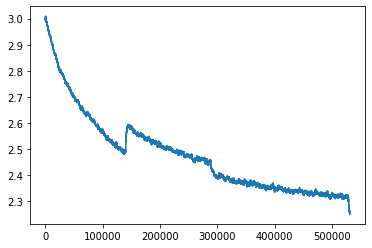

In [770]:
pd.Series(losses).ewm(1000).mean()[100:].plot();

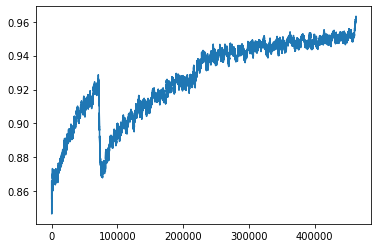

In [771]:
pd.Series(accuracies).ewm(1000).mean()[100:].plot();

In [584]:
myv

['Агджабеди, Азербайджан[32] Артвин, Турция Ашдод, Израиль (2012)[33] Бари, Италия (1987)[32] Брест, Белоруссия (2015)[34] Бургас, Болгария Ванадзор, Армения (2006)[32] Верона, Италия Волос, Греция (2007)[32] Даугавпилс, Латвия (3 августа 2012) Донецк, Украина (2013)[35] Кисловодск, Россия (1997)[32] Кушадасы, Турция Марбелья, Испания Нахичевань, Азербайджан Николаев, Украина (1995)[32] Новый Орлеан, США (2012) Орду, Турция Пирей, Греция (1996)[32] Рио-де-Жанейро, Бразилия Саванна, США (1992)[32] Сан-Себастьян, Испания (1987)[32] Тернополь, Украина (2011)[32] Трабзон, Турция (2000)[32] Урумчи, КНР (2015)[36] Цзыбо, КНР Ялова, Турция / Ялта, Украина / Россия (2008)[32]',
 'сёрмадомань',
 'эцемс',
 'седе пек']

In [585]:
ru

['Батуми ночью', 'записной', 'забраться', 'наиболее']

In [587]:
len(myv[0])

674

In [779]:
NEW_MODEL_NAME = 'labse_erzya_v0' # the same model name; updated embeddings
model.save_pretrained(NEW_MODEL_NAME)
tokenizer.save_pretrained(NEW_MODEL_NAME)

('labse_erzya_v0\\tokenizer_config.json',
 'labse_erzya_v0\\special_tokens_map.json',
 'labse_erzya_v0\\vocab.txt',
 'labse_erzya_v0\\added_tokens.json')

# Next step: adding MLM loss on non-parallel sentences

Two modifications to the model:
* train to make embeddings close to that of the original LaBSE model (to avoid drifting both ru and myv embeddings away)
* train on non-parallel sentences with MLM loss

In [49]:
from transformers import AutoModelForPreTraining, AutoTokenizer, BertTokenizer, AutoModel

In [72]:
import torch
import gc
import numpy as np
import matplotlib.pyplot as plt

def cleanup():
    gc.collect()
    torch.cuda.empty_cache()
    
cleanup()

In [50]:
base_model_name = 'labse_erzya_v0'

In [54]:
model = AutoModelForPreTraining.from_pretrained(base_model_name).cuda()
tokenizer = AutoTokenizer.from_pretrained(base_model_name)

In [125]:
pair_lens = [len(tokenizer.encode(*p)) for p in tqdm(all_pairs)]

  0%|          | 0/73633 [00:00<?, ?it/s]

In [127]:
pd.Series(pair_lens).quantile([0.5, 0.75, 0.9, 0.95, 0.99, 1])

0.50      10.0
0.75      37.0
0.90      61.0
0.95      76.0
0.99     111.0
1.00    1787.0
dtype: float64

In [235]:
short_pairs = [p for p in tqdm(all_pairs) if len(tokenizer.encode(*p)) <= 100]
print(len(all_pairs), len(short_pairs))

  0%|          | 0/77630 [00:00<?, ?it/s]

77630 76425


In [55]:
teacher_model_name = 'cointegrated/LaBSE-en-ru'
teacher_tokenizer = AutoTokenizer.from_pretrained(teacher_model_name)

In [56]:
teacher_model = AutoModel.from_pretrained(teacher_model_name).cuda()

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [57]:
def get_acc2(e1, e2):
    batch_size = e1.shape[0]
    with torch.no_grad():
        scores = torch.matmul(e1, e2.T).cpu().numpy()
    a1 = (scores.argmax(1) == np.arange(batch_size)).mean()
    a2 = (scores.argmax(0) == np.arange(batch_size)).mean()
    return (a1 + a2) / 2

In [328]:
a = list('abc')
a.insert(2, 'd')
a

['a', 'b', 'd', 'c']

In [419]:
def corrupt_sentence(sent, ix, p_edit=0.5):
    sent = sent.split()
    old_sent = sent[:]
    while sent == old_sent:
        # insert a random word
        if random.random() < p_edit or len(sent) == 1:
            other_sent = random.choice(all_pairs)[ix].split()
            sent.insert(random.randint(0, len(sent) - 1), random.choice(other_sent))
        # replace a random word
        if random.random() < p_edit and len(sent) > 1:
            other_sent = random.choice(all_pairs)[ix].split()
            sent[random.randint(0, len(sent) - 1)] = random.choice(other_sent)
        # remove a word
        if random.random() < p_edit and len(sent) > 1:
            sent.pop(random.randint(0, len(sent) - 1))
        # swap words
        if random.random() < p_edit and len(sent) > 1:
            i, j = random.sample(range(len(sent)), 2)
            sent[i], sent[j] = sent[j], sent[i]
    return ' '.join(sent)

def corrupt_pair(pair):
    """ Corrupt one (randomly chosen) sentence in a pair """
    pair = list(pair)
    ix = random.choice([0, 1])
    sent = pair[ix]
    pair[ix] = corrupt_sentence(sent, ix)
    return pair

In [420]:
def get_pairs_batch(bs=4):
    pp = random.choices(short_pairs, k=int(np.ceil(bs/2)))
    labels = [1] * len(pp) + [0] * len(pp)
    if random.random() < 0.5:
        # make negatives by swapping sentence with a random one
        pp.extend([(pp[i][0], pp[i-1][1]) for i in range(len(pp))])
    else:
        # make negatives by corrupting existing sentences
        pp.extend([corrupt_pair(p) for p in pp])
    pp = [[x, y] if random.random() < 0.5 else [y, x] for x, y in pp]
    
    return [list(t) for t in zip(*pp)], labels

In [58]:
from transformers import DataCollatorForWholeWordMask
collator = DataCollatorForWholeWordMask(tokenizer, mlm=True, mlm_probability=0.3)

In [59]:
for p in model.parameters():
    p.requires_grad = True

In [61]:
from transformers.optimization import Adafactor
optimizer = Adafactor(
    [p for p in model.parameters() if p.requires_grad], 
    scale_parameter=False, relative_step=False, 
    lr=2e-6, # make it very slow, because we want to update too many parameters
    clip_threshold=1.0
)
# optimizer.param_groups[0]['lr'] = 2e-6

In [67]:
loss_fn = torch.nn.CrossEntropyLoss()

In [65]:
mlm_batch_size = 2
batch_size = 4
margin = 0.3

In [63]:
losses2 = []
accuracies2 = []
losses_mlm = []

In [183]:
losses_ce = []

In [ ]:
model.train()
tq = trange(300_000)
for i in tq:
    myv, ru = [list(p) for p in zip(*random.choices(all_pairs, k=batch_size))]
    try:
        # translation ranking step step
        # in half cases, pull embeddings to the teacher; in other half - to self. 
        tm, tt = (teacher_model, teacher_tokenizer) if random.random() < 0.5 else (model.bert, tokenizer)
        ru_batch = tt(ru, return_tensors='pt', padding=True, truncation=True, max_length=128)
        with torch.no_grad():
            ru_emb = torch.nn.functional.normalize(tm(**ru_batch.to(teacher_model.device)).pooler_output)

        myv_batch = tokenizer(myv, return_tensors='pt', padding=True, truncation=True, max_length=128)
        myv_emb = torch.nn.functional.normalize(model.bert(**myv_batch.to(model.device)).pooler_output)
        all_scores = torch.matmul(ru_emb, myv_emb.T) - torch.eye(batch_size, device=model.device) * margin
        loss = loss_fn(all_scores, torch.arange(batch_size, device=model.device)) + loss_fn(all_scores.T, torch.arange(batch_size, device=model.device))
        loss.backward()
        losses2.append(loss.item())
        accuracies2.append(get_acc2(myv_emb, ru_emb))
        
        # mlm step
        sents = random.choices(all_sentences, k=mlm_batch_size)
        myv_batch = {k: v.to(model.device) for k, v in collator([tokenizer(s) for s in sents]).items()}
        loss = loss_fn(
            model(**myv_batch).prediction_logits.view(-1, model.config.vocab_size), 
            myv_batch['labels'].view(-1)
        )
        loss.backward()
        losses_mlm.append(loss.item())
        
        # cross-encoder step
        pp, pl = get_pairs_batch(bs=4)
        loss = loss_fn(
            model(
                **tokenizer(*pp, padding=True, truncation=True, max_length=128, return_tensors='pt').to(model.device)
            ).seq_relationship_logits.view(-1, 2),
            torch.tensor(pl, device=model.device)
        )
        loss.backward()
        losses_ce.append(loss.item())
        
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)
        
    except RuntimeError:
        optimizer.zero_grad(set_to_none=True)
        batch, out, embeddings, all_scores, loss = None, None, None, None, None
        cleanup()
        print('error', max(len(s) for s in myv+ru))
        continue
    if i % 100 == 0:
        print(i, np.mean(losses2[-100:]), np.mean(accuracies2[-100:]), np.mean(losses_mlm[-100:]), np.mean(losses_ce[-100:]))

  0%|          | 0/300000 [00:00<?, ?it/s]

0 2.2633165907859802 0.9625 5.76052170753479 0.2482785230781883
100 2.2550850749015807 0.9775 5.839994730949402 0.24404158127494158
200 2.311798061132431 0.95 5.564939630031586 0.2967242539441213
300 2.256009542942047 0.9725 5.495200880169868 0.27820112332236024
400 2.3052890253067018 0.94875 5.545244226455688 0.2595865166164003
500 2.287625743150711 0.9625 5.725169218629599 0.22631934439297766
600 2.2701006603240965 0.9475 5.419301118254662 0.29615319507196547
700 2.2483345711231233 0.97625 5.762264189720153 0.2673908222047612
800 2.3012849068641663 0.95375 5.591793793737889 0.21750230301171541
900 2.2688322353363035 0.9725 5.633097656369209 0.27824340558843685
1000 2.29024888753891 0.955 5.448489968776703 0.26712789928074926
1100 2.2893646264076235 0.9675 5.47394932448864 0.23252736731432377
1200 2.2831146824359894 0.95 5.549178869724273 0.26933247468899935
1300 2.2957391011714936 0.95 5.3857043543457985 0.25279897306114435
1400 2.2922820901870726 0.95625 5.388298223614693 0.28271817

12000 2.2370961022377016 0.96875 5.462704008817672 0.25248355449410154
12100 2.2660952603816984 0.955 5.599624400138855 0.22994319963501766
12200 2.2829912638664247 0.97375 5.344158334434033 0.24394688343163579
12300 2.276161631345749 0.96875 5.16299389719963 0.33035026024561376
12400 2.2259155392646788 0.9625 5.3316812682151795 0.30248653820715843
12500 2.254231159687042 0.9775 5.447694432735443 0.20527239507995546
12600 2.260325500965118 0.965 5.593490819931031 0.19486590817570687
12700 2.2638343942165373 0.97875 5.526470835208893 0.2769223568262532
12800 2.2735543990135194 0.97 5.197430112361908 0.21782605211250483
12900 2.2835998344421387 0.9625 5.591362706422806 0.24124387411400675
13000 2.277768164873123 0.965 5.616412639021873 0.25663057478144763
13100 2.3031309413909913 0.96125 5.543754137754441 0.2342808654718101
13200 2.289302216768265 0.9725 5.43480545938015 0.2549002024112269
13300 2.243105789422989 0.95875 5.657428889274597 0.27424907858250663


In [237]:
optimizer.zero_grad(set_to_none=True)
ru_batch, ru_emb, myv_batch, myv_emb, all_scores, loss = None, None, None, None, None, None
cleanup()

Added dropout on step 120k; in a few hundred steps added cross-encoder loss. Everything went up, but it is only an illusion.

At step 340K, added more difficult pairs for translation detection => much much higher loss. 

358122


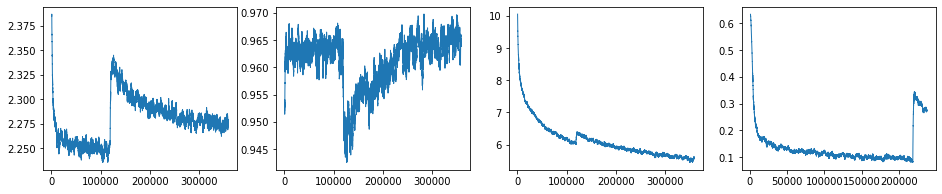

In [431]:
print(len(losses2))
plt.figure(figsize=(16, 3))
for i, s in enumerate([losses2, accuracies2, losses_mlm, losses_ce]):
    plt.subplot(1, 4, i+1)
    pd.Series(s).ewm(1000).mean()[1000:].plot(lw=1);

In total, we managed to train for 358122 steps, before the kernel crashed due to external reasons. 

In [432]:
NEW_MODEL_NAME = 'labse_erzya_v1' # the same model name; updated embeddings AND weights
model.save_pretrained(NEW_MODEL_NAME)
tokenizer.save_pretrained(NEW_MODEL_NAME)

('labse_erzya_v1\\tokenizer_config.json',
 'labse_erzya_v1\\special_tokens_map.json',
 'labse_erzya_v1\\vocab.txt',
 'labse_erzya_v1\\added_tokens.json',
 'labse_erzya_v1\\tokenizer.json')

In [286]:
random.choice(all_sentences)

'Ниле иеде ламо тосо важодемстэ учинь школасо тарка.Неть иетнестэ васенцеде вастовинь С.М. Люлякинань марто (сон сакшнось минек велес эрзянь журналтнэнь ды газетатнень кис агитировамо).'

In [258]:
def test_mask(text):
    input = tokenizer.encode_plus(text, return_tensors = "pt").to(model.device)
    mask_index = torch.where(input["input_ids"][0] == tokenizer.mask_token_id)[0]

    with torch.no_grad():
        output = model(**input)
        logits = output.prediction_logits
        softmax = torch.softmax(logits, dim = -1)
        mask_word = softmax[0, mask_index, :]
        top_10 = torch.topk(mask_word, 10, dim = 1)[1][0]
    for token in top_10:
       word = tokenizer.decode([token])
       new_sentence = text.replace(tokenizer.mask_token, word)
       print(new_sentence)

In [436]:
test_mask('2018 иестэ саезь книганть лангсо важодсть Самарань ды [MASK] специалисттнэ, весемезэ сисем ломанть.')

2018 иестэ саезь книганть лангсо важодсть Самарань ды ошонь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Саранск специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды мокшонь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Пушкин специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Саран специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Саранскоень специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды рузонь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды райононь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды лия специалисттнэ, весемезэ сисем л

In [435]:
test_mask('2018 иестэ саезь [MASK] лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.')

2018 иестэ саезь сцена лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь школа лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь Пушкин лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь школасо лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь ошонь лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь пейзаж лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь моданть лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь Александровна лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь государственной лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь школань лангсо важодсть Самарань ды Мордовиянь спе

In [434]:
test_mask('(сон сакшнось минек велес эрзянь [MASK] ды газетатнень кис агитировамо).')

(сон сакшнось минек велес эрзянь Культурань ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь культурань ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь газетань ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь келень ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь литературань ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь искусствань ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь газета ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь произведеният ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь хозяйствань ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь келенть ды газетатнень кис агитировамо).


In [433]:
test_mask('(сон сакшнось минек велес [MASK] литературань  ды газетатнень кис агитировамо).')

(сон сакшнось минек велес , литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ##со литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ды литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес марто литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ##нь литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ) литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес : литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес - литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес » литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ##онь литературань  ды газетатнень кис агитировамо).


# Continue training after reboot

In [68]:
from transformers import AutoModelForPreTraining, AutoTokenizer, AutoModel

In [54]:
model_path = 'labse_erzya_v1' # the same model name; updated embeddings AND weights
model = AutoModelForPreTraining.from_pretrained(model_path).cuda()
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [55]:
import torch
import gc
import numpy as np
import matplotlib.pyplot as plt

def cleanup():
    gc.collect()
    torch.cuda.empty_cache()
    
cleanup()

In [57]:
short_pairs = [p for p in tqdm(all_pairs) if len(tokenizer.encode(*p)) <= 100]
print(len(all_pairs), len(short_pairs))

  0%|          | 0/77630 [00:00<?, ?it/s]

77630 76425


In [58]:
teacher_model_name = 'cointegrated/LaBSE-en-ru'
teacher_tokenizer = AutoTokenizer.from_pretrained(teacher_model_name)

In [69]:
teacher_model = AutoModel.from_pretrained(teacher_model_name).cuda()

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [70]:
def get_acc2(e1, e2):
    batch_size = e1.shape[0]
    with torch.no_grad():
        scores = torch.matmul(e1, e2.T).cpu().numpy()
    a1 = (scores.argmax(1) == np.arange(batch_size)).mean()
    a2 = (scores.argmax(0) == np.arange(batch_size)).mean()
    return (a1 + a2) / 2

In [71]:
def corrupt_sentence(sent, ix, p_edit=0.5):
    sent = sent.split()
    old_sent = sent[:]
    while sent == old_sent:
        # insert a random word
        if random.random() < p_edit or len(sent) == 1:
            other_sent = random.choice(all_pairs)[ix].split()
            sent.insert(random.randint(0, len(sent) - 1), random.choice(other_sent))
        # replace a random word
        if random.random() < p_edit and len(sent) > 1:
            other_sent = random.choice(all_pairs)[ix].split()
            sent[random.randint(0, len(sent) - 1)] = random.choice(other_sent)
        # remove a word
        if random.random() < p_edit and len(sent) > 1:
            sent.pop(random.randint(0, len(sent) - 1))
        # swap words
        if random.random() < p_edit and len(sent) > 1:
            i, j = random.sample(range(len(sent)), 2)
            sent[i], sent[j] = sent[j], sent[i]
    return ' '.join(sent)

def corrupt_pair(pair):
    """ Corrupt one (randomly chosen) sentence in a pair """
    pair = list(pair)
    ix = random.choice([0, 1])
    sent = pair[ix]
    pair[ix] = corrupt_sentence(sent, ix)
    return pair

In [72]:
def get_pairs_batch(bs=4):
    pp = random.choices(short_pairs, k=int(np.ceil(bs/2)))
    labels = [1] * len(pp) + [0] * len(pp)
    if random.random() < 0.5:
        # make negatives by swapping sentence with a random one
        pp.extend([(pp[i][0], pp[i-1][1]) for i in range(len(pp))])
    else:
        # make negatives by corrupting existing sentences
        pp.extend([corrupt_pair(p) for p in pp])
    pp = [[x, y] if random.random() < 0.5 else [y, x] for x, y in pp]
    
    return [list(t) for t in zip(*pp)], labels

In [60]:
from transformers import DataCollatorForWholeWordMask
collator = DataCollatorForWholeWordMask(tokenizer, mlm=True, mlm_probability=0.3)

In [61]:
for p in model.parameters():
    p.requires_grad = True

In [62]:
from transformers.optimization import Adafactor
optimizer = Adafactor(
    [p for p in model.parameters() if p.requires_grad], 
    scale_parameter=False, relative_step=False, 
    lr=2e-6, # make it very slow, because we want to update too many parameters
    clip_threshold=1.0
)
# optimizer.param_groups[0]['lr'] = 2e-6

In [63]:
loss_fn = torch.nn.CrossEntropyLoss()

In [64]:
mlm_batch_size = 2
batch_size = 4
margin = 0.3

In [66]:
losses2 = []
accuracies2 = []
losses_mlm = []
losses_ce = []

In [126]:
model.train()
tq = trange(300_000)
for i in tq:
    myv, ru = [list(p) for p in zip(*random.choices(all_pairs, k=batch_size))]
    try:
        # translation ranking step step
        # in half cases, pull embeddings to the teacher; in other half - to self. 
        tm, tt = (teacher_model, teacher_tokenizer) if random.random() < 0.5 else (model.bert, tokenizer)
        ru_batch = tt(ru, return_tensors='pt', padding=True, truncation=True, max_length=128)
        with torch.no_grad():
            ru_emb = torch.nn.functional.normalize(tm(**ru_batch.to(teacher_model.device)).pooler_output)

        myv_batch = tokenizer(myv, return_tensors='pt', padding=True, truncation=True, max_length=128)
        myv_emb = torch.nn.functional.normalize(model.bert(**myv_batch.to(model.device)).pooler_output)
        all_scores = torch.matmul(ru_emb, myv_emb.T) - torch.eye(batch_size, device=model.device) * margin
        loss = loss_fn(all_scores, torch.arange(batch_size, device=model.device)) + loss_fn(all_scores.T, torch.arange(batch_size, device=model.device))
        loss.backward()
        losses2.append(loss.item())
        accuracies2.append(get_acc2(myv_emb, ru_emb))
        
        # mlm step
        sents = random.choices(all_sentences, k=mlm_batch_size)
        myv_batch = {k: v.to(model.device) for k, v in collator([tokenizer(s) for s in sents]).items()}
        loss = loss_fn(
            model(**myv_batch).prediction_logits.view(-1, model.config.vocab_size), 
            myv_batch['labels'].view(-1)
        )
        loss.backward()
        losses_mlm.append(loss.item())
        
        # cross-encoder step
        pp, pl = get_pairs_batch(bs=4)
        loss = loss_fn(
            model(
                **tokenizer(*pp, padding=True, truncation=True, max_length=128, return_tensors='pt').to(model.device)
            ).seq_relationship_logits.view(-1, 2),
            torch.tensor(pl, device=model.device)
        )
        loss.backward()
        losses_ce.append(loss.item())
        
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)
        
    except RuntimeError:
        optimizer.zero_grad(set_to_none=True)
        batch, out, embeddings, all_scores, loss = None, None, None, None, None
        cleanup()
        print('error', max(len(s) for s in myv+ru))
        continue
    if i % 100 == 0:
        print(i, np.mean(losses2[-100:]), np.mean(accuracies2[-100:]), np.mean(losses_mlm[-100:]), np.mean(losses_ce[-100:]))

  0%|          | 0/300000 [00:00<?, ?it/s]

0 2.2575094509124756 0.97375 4.838617547750473 0.22978557605063543
100 2.2240990126132965 0.975 5.106414977312088 0.22290227346587926
200 2.264026275873184 0.98125 5.2418779015541075 0.20482552862726153
300 2.274596691131592 0.9825 5.202867120504379 0.16304172050673515
400 2.22374990105629 0.96 5.055300569534301 0.1705955007718876
500 2.266619393825531 0.9725 5.122816634774208 0.14156278443755582
600 2.289240571260452 0.975 5.121324732601643 0.23306222741201055
700 2.2915099251270292 0.96125 5.055006603896618 0.1351705885003321
800 2.2882922613620758 0.98 5.208745607882738 0.2250130078336224
900 2.279128301143646 0.9625 5.059159638881684 0.19646110726287588
1000 2.2892199206352233 0.96875 5.169292038679123 0.1830881323828362
1100 2.2844565153121947 0.9675 5.098052794337272 0.14343544633476996
1200 2.2692313039302827 0.96875 5.3371937388181685 0.20681401437846944
1300 2.2551062536239623 0.975 5.344616045504808 0.1617470502119977
1400 2.252299054861069 0.98 5.398797961473465 0.1601133360

11900 2.281592571735382 0.965 5.211987713575363 0.16193519402411766
12000 2.2772851192951205 0.96625 5.008845525681973 0.181713217520155
12100 2.2718026983737944 0.97375 5.175409384071827 0.1265886755241081
12200 2.2850073957443238 0.96875 5.154564288258553 0.22683557330048643
error 147
12300 2.292833480834961 0.96375 5.098923442363739 0.2095348669565283
12400 2.3370813405513764 0.95625 5.219241884946823 0.1863439883221872
12500 2.2954159390926363 0.95625 5.255072288513183 0.2307851844537072
12600 2.3035721349716187 0.97625 5.272269651889801 0.16550394593621603
12700 2.287083988189697 0.965 5.282873398065567 0.14984355997294188
12800 2.274806467294693 0.96625 5.290914981365204 0.15458086480619385
12900 2.2904775178432466 0.97625 5.314686278104782 0.13048835995257832
13000 2.296052451133728 0.9625 5.249566118717194 0.2132325414090883
13100 2.2689951145648957 0.96875 5.254428241252899 0.15502738317940384
13200 2.299924274682999 0.96375 5.150377217829227 0.15643087812350132
13300 2.276918

KeyboardInterrupt: 

In [118]:
optimizer.zero_grad(set_to_none=True)
ru_batch, ru_emb, myv_batch, myv_emb, all_scores, loss = None, None, None, None, None, None
cleanup()

...

252422


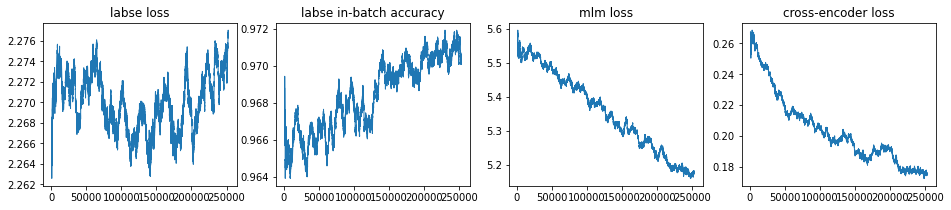

In [127]:
print(len(losses2))
plt.figure(figsize=(16, 3))
names = ['labse loss', 'labse in-batch accuracy', 'mlm loss', 'cross-encoder loss']
for i, s in enumerate([losses2, accuracies2, losses_mlm, losses_ce]):
    plt.subplot(1, 4, i+1)
    pd.Series(s).ewm(5000).mean()[1000:].plot(lw=1)
    plt.title(names[i])

In [128]:
NEW_MODEL_NAME = 'labse_erzya_v1' # the same model name; updated embeddings AND weights
model.save_pretrained(NEW_MODEL_NAME)
tokenizer.save_pretrained(NEW_MODEL_NAME)

('labse_erzya_v1\\tokenizer_config.json',
 'labse_erzya_v1\\special_tokens_map.json',
 'labse_erzya_v1\\vocab.txt',
 'labse_erzya_v1\\added_tokens.json',
 'labse_erzya_v1\\tokenizer.json')

In [129]:
random.choice(all_sentences)

'Волго-Вятское междуречье), пандолангонь (сынь эрить Рав леенть вить ды керш чирева), чилисемань (сынь теевсть-пурнавсть Рав леенть нарлангонь ёнксто Башкирэнь Масторов ды Уралваксcов (руз.'

In [130]:
def test_mask(text):
    input = tokenizer.encode_plus(text, return_tensors = "pt").to(model.device)
    mask_index = torch.where(input["input_ids"][0] == tokenizer.mask_token_id)[0]

    with torch.no_grad():
        output = model(**input)
        logits = output.prediction_logits
        softmax = torch.softmax(logits, dim = -1)
        mask_word = softmax[0, mask_index, :]
        top_10 = torch.topk(mask_word, 10, dim = 1)[1][0]
    for token in top_10:
       word = tokenizer.decode([token])
       new_sentence = text.replace(tokenizer.mask_token, word)
       print(new_sentence)

In [131]:
test_mask('2018 иестэ саезь книганть лангсо важодсть Самарань ды [MASK] специалисттнэ, весемезэ сисем ломанть.')

2018 иестэ саезь книганть лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Том специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Московонь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Саранск специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Самарань специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Саранскоень специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Саран специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды мокшонь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды республикань специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь книганть лангсо важодсть Самарань ды Ленинградонь специалисттнэ, 

In [132]:
test_mask('2018 иестэ саезь [MASK] лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.')

2018 иестэ саезь сцена лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь сонзэ лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь моданть лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь сценанть лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь те лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь Сонзэ лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь школанть лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь ошонь лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь проектэнть лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ сисем ломанть.
2018 иестэ саезь , лангсо важодсть Самарань ды Мордовиянь специалисттнэ, весемезэ

In [133]:
test_mask('(сон сакшнось минек велес эрзянь [MASK] ды газетатнень кис агитировамо).')

(сон сакшнось минек велес эрзянь газета ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь кельсэ ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь газетань ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь кельс ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь келень ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь кельтнень ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь келенть ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь кель ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь литературань ды газетатнень кис агитировамо).
(сон сакшнось минек велес эрзянь кельстэ ды газетатнень кис агитировамо).


In [134]:
test_mask('(сон сакшнось минек велес [MASK] литературань  ды газетатнень кис агитировамо).')

(сон сакшнось минек велес ##со литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ##сэ литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ##энь литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ##с литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес , литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес марто литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ##онть литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ##нь литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ##сонть литературань  ды газетатнень кис агитировамо).
(сон сакшнось минек велес ##нть литературань  ды газетатнень кис агитировамо).
